# Simple Linear Regression

The goal of this project was to build a linear regression model from the ground up using numpy.

In [1]:
%matplotlib inline

#imports
#from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set()

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

In [2]:
#points = genfromtxt('data.csv', delimiter=',')
df_points = pd.read_csv('data.csv')
df_points

,Hours of study,Test scores
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [3]:
df_points.describe()

,Hours of study,Test scores
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


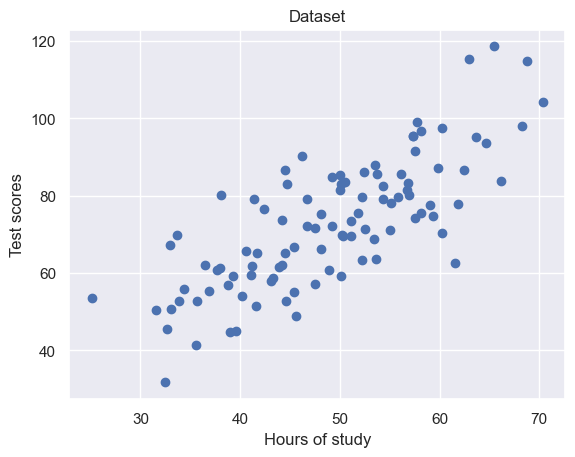

In [4]:
#Extract columns
X = df_points[["Hours of study"]]
y = df_points[["Test scores"]]

#Plot the dataset
plt.scatter(X,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

We can see that as the hours spending studying increase so does the test score. This is called a linear trend between the two variables.

## Split dataset

Since we are only doing a linear regression, we only need a training and test set. We can't use a validation set, as there are no hyperparameters/variables we can set.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
reg = LinearRegression().fit(X_train, y_train)

In [7]:
y_pred = reg.predict(X_test)

## Plot Linear Regression

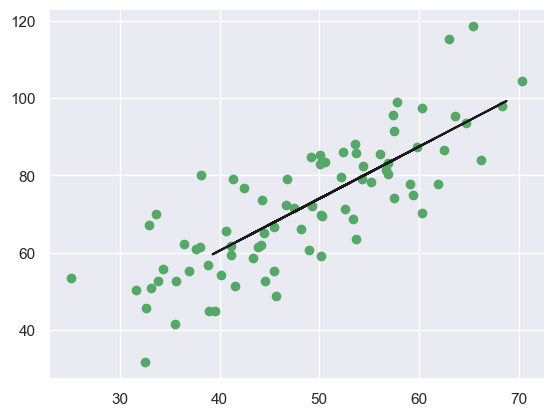

In [8]:
plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, y_pred, color='k')

plt.show()

# Regression Tree   

With regression trees, there are multiple variables we can play around with, so we will need a validation set.

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as sklearn_tree

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

## Trying out different max_depth

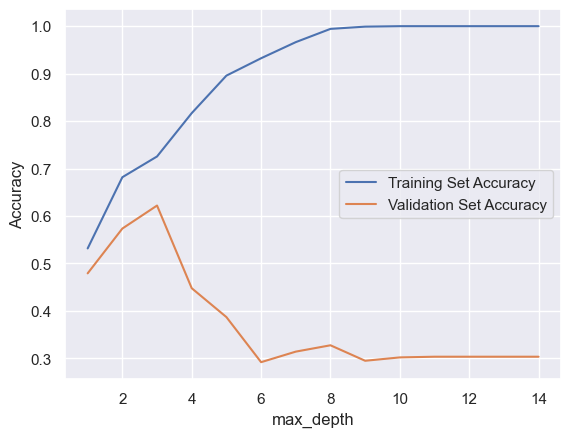

In [10]:
training_accuracy = []
val_accuracy = []

max_dep = range(1, 15)

for md in max_dep:
    tree = DecisionTreeRegressor(max_depth=md, random_state=0, criterion="squared_error")
    tree.fit(X_train, y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    val_accuracy.append(tree.score(X_val, y_val))
    
plt.plot(max_dep, training_accuracy, label='Training Set Accuracy')
plt.plot(max_dep, val_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend()

By looking at plot, best results are obtained for `max_depth == 3`. After that, the training accuracy rises to 1 but the validation accuracy drops to 0.3. This means that our model is overfitting. It fits the training data so well that most new and unseen data does not get classified correctly. (Remember the squiggly function vs. the linear regression in the lecture)   

Other parameters that control the size of the tree and can provide better results are:
* `min_samples_leaf`- The minimum number of samples required to be at a leaf node
* `min_samples_split` - The minimum number of samples required to split an internal node:
* `max_leaf_nodes` - Grow a tree with max_leaf_nodes in best-first fashion.

## Calculate Accuracy of Test Set

In [11]:
# test
tree = DecisionTreeRegressor(max_depth=val_accuracy.index(max(val_accuracy)) + 1, random_state=0, criterion="squared_error")
tree.fit(X_train, y_train)
test_accuracy = tree.score(X_train, y_train)

In [12]:
print('Accuracy on the test set for max_depth={0}: {1:.3f}'.format(val_accuracy.index(max(val_accuracy)) + 1,  test_accuracy))

Accuracy on the test set for max_depth=3: 0.725


## Visualizing the best Decision Tree

[Text(0.5, 0.875, 'Hours of study <= 49.098\nsquared_error = 280.469\nsamples = 64\nvalue = 71.183'),
 Text(0.25, 0.625, 'Hours of study <= 36.057\nsquared_error = 117.169\nsamples = 31\nvalue = 58.583'),
 Text(0.125, 0.375, 'Hours of study <= 32.805\nsquared_error = 86.967\nsamples = 9\nvalue = 50.134'),
 Text(0.0625, 0.125, 'squared_error = 80.811\nsamples = 3\nvalue = 43.577'),
 Text(0.1875, 0.125, 'squared_error = 57.803\nsamples = 6\nvalue = 53.412'),
 Text(0.375, 0.375, 'Hours of study <= 40.079\nsquared_error = 88.376\nsamples = 22\nvalue = 62.039'),
 Text(0.3125, 0.125, 'squared_error = 125.598\nsamples = 7\nvalue = 58.487'),
 Text(0.4375, 0.125, 'squared_error = 62.369\nsamples = 15\nvalue = 63.697'),
 Text(0.75, 0.625, 'Hours of study <= 60.283\nsquared_error = 144.649\nsamples = 33\nvalue = 83.019'),
 Text(0.625, 0.375, 'Hours of study <= 54.006\nsquared_error = 89.008\nsamples = 26\nvalue = 79.199'),
 Text(0.5625, 0.125, 'squared_error = 80.707\nsamples = 13\nvalue = 75.354

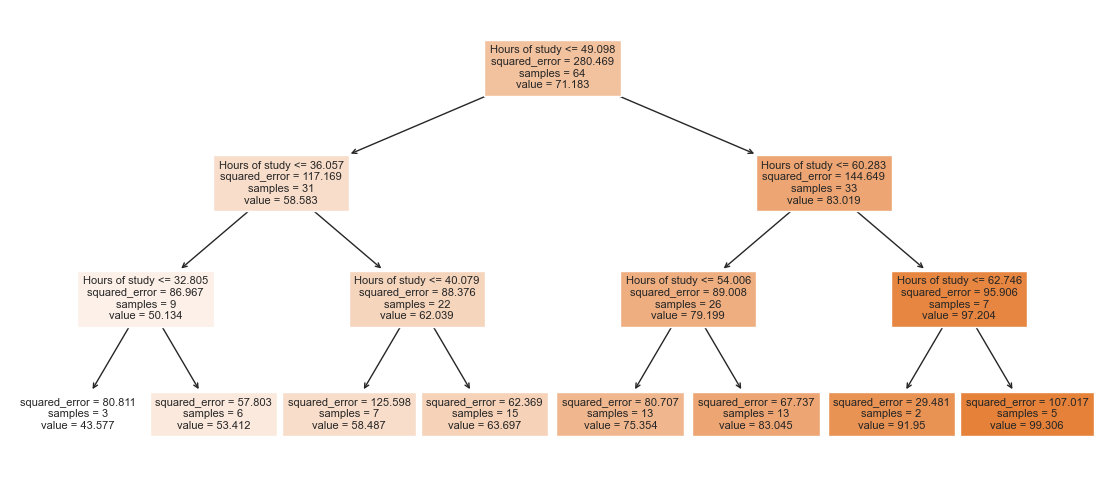

In [13]:
tree = DecisionTreeRegressor(max_depth=max_dep[val_accuracy.index(max(val_accuracy))], random_state=0)
clf = tree.fit(X_train, y_train)
plt.figure(figsize=(14,6))
sklearn_tree.plot_tree(tree, filled=True, fontsize=8, feature_names=list(df_points.columns), rounded=False)